In [1]:
import pandas as pd
import numpy as np
from utils import *

import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linalg as LA
from tqdm import tqdm

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [24]:
X = pd.read_csv('data/Xtr0_mat50.csv', sep=' ', header=None)
Y = pd.read_csv('data/Ytr0.csv', sep=',', header=0)
X_t = pd.read_csv('data/Xte0_mat50.csv', sep=' ', header=None)
# Y_test = pd.read_csv('data/Yte0.csv', sep=',', header=0)
Y.columns = ["idx", "bound"]
Y = Y.drop(["idx"], axis=1)
# Y_test.columns = ["idx", "bound"]
# Y_test = Y_test.drop(["idx"], axis=1)

In [25]:
print(Y.shape)
print(X.shape)

(2000, 1)
(2000, 50)


In [31]:
from sklearn import svm

clf = svm.SVC(C=0.0005, kernel='poly', degree=4)
X_train, Y_train, X_test, Y_test = preprocessing(X, Y)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(np.sum(Y_test == Y_pred)/len(Y_test))

0.47


0.49


In [13]:
w_value_hist = []
ac_range2 = []
# for tau = 0.0001 et tol = 0.1 on obtient acc = 59.5
# for tau = [0.005, 0.01, 0.05] on obtient : [53.5, 49.5, 46.5]

taurange = [5e-5, 1e-5] # , 0.1, 0.15, 0.2, 0.3]

for tau in taurange:
    acc_range=[]
    it = 0
    # while(it < 20):
    # for it in tqdm(range(0)):
    X_train, Y_train, X_test, Y_test = preprocessing(X, Y)
    mu = 1.1
    w, w_hist, phi_w_hist = SVM_vector(X_train, Y_train, tau, mu, tol=0.1)
    print('etape3')
    w_value_hist.append(w)
    Y_predicted, acc = predict(w, X_test, Y_test)
        
    ac_range2.append(acc)

we want 1.0 to be less than 0.1
we want 0.9090909090909091 to be less than 0.1
we want 0.8264462809917353 to be less than 0.1
we want 0.7513148009015775 to be less than 0.1
we want 0.6830134553650704 to be less than 0.1
we want 0.6209213230591548 to be less than 0.1
we want 0.5644739300537771 to be less than 0.1
we want 0.5131581182307065 to be less than 0.1
we want 0.4665073802097331 to be less than 0.1
we want 0.42409761837248455 to be less than 0.1
we want 0.38554328942953137 to be less than 0.1
we want 0.35049389948139215 to be less than 0.1
we want 0.31863081771035645 to be less than 0.1
we want 0.2896643797366877 to be less than 0.1
we want 0.26333125430607973 to be less than 0.1
we want 0.23939204936916336 to be less than 0.1
we want 0.2176291357901485 to be less than 0.1
we want 0.197844668900135 to be less than 0.1
we want 0.1798587899092136 to be less than 0.1
we want 0.16350799082655781 to be less than 0.1
we want 0.14864362802414346 to be less than 0.1
we want 0.13513057093

In [9]:
print(acc)

55.50000000000001


In [14]:
print(ac_range2)

[60.0, 59.0]


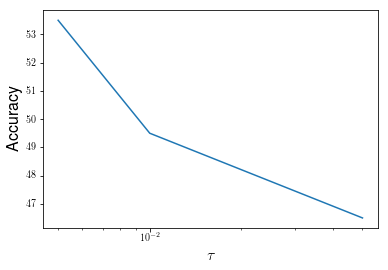

In [12]:
fig = plt.figure()
ax = fig.gca()
line1, = ax.plot(taurange, ac_range2)
ax.set_xscale('log')
ax.set_ylabel(r'Accuracy', fontsize=16)
ax.set_xlabel(r'$\tau$', fontsize=16)
plt.show()